In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D

# File to Load 

file_to_load = "cardio_train_project_1.csv"

# Read Purchasing File and Store Into Pandas Data Frame

cardio_data = pd.read_csv(file_to_load)

# Test Chart

cardio_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [2]:
# Change Age from Days to Years

age=cardio_data ["age"] / 365
age_rounded=age.apply(np.floor)

# Make a New Column for Age

cardio_data["Age in Years"] = age_rounded

# Drop Column

cardio_data = cardio_data.drop("age", 1)

# Test Chart

cardio_data

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.0
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52.0
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61.0
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.0


In [3]:
# Convert Height from Centimeters to Feet

height_in_feet=(cardio_data["height"]*.394)/12
cardio_data["height"].apply(np.floor)

# Make a New Column for Height

cardio_data["Height in Feet"] = height_in_feet

# Drop Column

cardio_data = cardio_data.drop("height", 1)

# Test Chart

cardio_data

,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet
0,0,2,62.0,110,80,1,1,0,0,1,0,50.0,5.516000
1,1,1,85.0,140,90,3,1,0,0,1,1,55.0,5.122000
2,2,1,64.0,130,70,3,1,0,0,0,1,51.0,5.417500
3,3,2,82.0,150,100,1,1,0,0,1,1,48.0,5.548833
4,4,1,56.0,100,60,1,1,0,0,0,0,47.0,5.122000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,76.0,120,80,1,1,1,0,1,0,52.0,5.516000
69996,99995,1,126.0,140,90,2,2,0,0,1,1,61.0,5.187667
69997,99996,2,105.0,180,90,3,1,0,1,0,1,52.0,6.008500
69998,99998,1,72.0,135,80,1,2,0,0,0,1,61.0,5.351833


In [4]:
# Convert Weight from Kilograms to Pounds

weight = (cardio_data["weight"]* 2.205)
cardio_data["weight"].apply(np.floor)

# Make a New Column for Weight

cardio_data["weight in lbs"] = weight

# Drop Column

cardio_data = cardio_data.drop("weight", 1)

# Test Chart

cardio_data

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs
0,0,2,110,80,1,1,0,0,1,0,50.0,5.516000,136.710
1,1,1,140,90,3,1,0,0,1,1,55.0,5.122000,187.425
2,2,1,130,70,3,1,0,0,0,1,51.0,5.417500,141.120
3,3,2,150,100,1,1,0,0,1,1,48.0,5.548833,180.810
4,4,1,100,60,1,1,0,0,0,0,47.0,5.122000,123.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,120,80,1,1,1,0,1,0,52.0,5.516000,167.580
69996,99995,1,140,90,2,2,0,0,1,1,61.0,5.187667,277.830
69997,99996,2,180,90,3,1,0,1,0,1,52.0,6.008500,231.525
69998,99998,1,135,80,1,2,0,0,0,1,61.0,5.351833,158.760


In [5]:
# Clean Up Gender Column

cardio_data['gender'] = cardio_data['gender'].replace(1, "male")
cardio_data['gender'] = cardio_data['gender'].replace(2, "female")

# Test Chart

cardio_data

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs
0,0,female,110,80,1,1,0,0,1,0,50.0,5.516000,136.710
1,1,male,140,90,3,1,0,0,1,1,55.0,5.122000,187.425
2,2,male,130,70,3,1,0,0,0,1,51.0,5.417500,141.120
3,3,female,150,100,1,1,0,0,1,1,48.0,5.548833,180.810
4,4,male,100,60,1,1,0,0,0,0,47.0,5.122000,123.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,female,120,80,1,1,1,0,1,0,52.0,5.516000,167.580
69996,99995,male,140,90,2,2,0,0,1,1,61.0,5.187667,277.830
69997,99996,female,180,90,3,1,0,1,0,1,52.0,6.008500,231.525
69998,99998,male,135,80,1,2,0,0,0,1,61.0,5.351833,158.760


In [6]:
# Clean Up Smoke Column

cardio_data['smoke'] = cardio_data['smoke'].replace(0, "Non-Smoker")
cardio_data['smoke'] = cardio_data['smoke'].replace(1, "Smoker")

# Test Chart

cardio_data

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs
0,0,female,110,80,1,1,Non-Smoker,0,1,0,50.0,5.516000,136.710
1,1,male,140,90,3,1,Non-Smoker,0,1,1,55.0,5.122000,187.425
2,2,male,130,70,3,1,Non-Smoker,0,0,1,51.0,5.417500,141.120
3,3,female,150,100,1,1,Non-Smoker,0,1,1,48.0,5.548833,180.810
4,4,male,100,60,1,1,Non-Smoker,0,0,0,47.0,5.122000,123.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,female,120,80,1,1,Smoker,0,1,0,52.0,5.516000,167.580
69996,99995,male,140,90,2,2,Non-Smoker,0,1,1,61.0,5.187667,277.830
69997,99996,female,180,90,3,1,Non-Smoker,1,0,1,52.0,6.008500,231.525
69998,99998,male,135,80,1,2,Non-Smoker,0,0,1,61.0,5.351833,158.760


In [7]:
# Check Total Smokers in Each Category

smoke = cardio_data ["smoke"].value_counts()

# Test Chart

smoke

Non-Smoker    63831
Smoker         6169
Name: smoke, dtype: int64

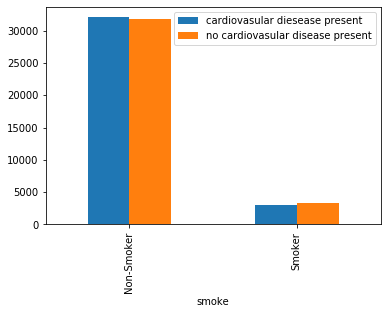

In [8]:
# Set Up Plot

weight_range=cardio_data.groupby(["smoke", "cardio"]).count()["id"]
df=pd.DataFrame(weight_range.reset_index())
df=df.set_index("smoke")
no_cardio_df= df.loc[df ["cardio"] == 0 ]
cardio_df= df.loc[df ["cardio"] == 1 ]
combined_df= pd.DataFrame({
     "cardiovasular diesease present": cardio_df["id"],
     "no cardiovasular disease present": no_cardio_df ["id"]
  })

# Test Plot

combined_df.plot.bar()

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D


# File to Load 
file_to_load = "cardio_train_project_1.csv"

# Read Purchasing File and store into Pandas data frame
cardio_data = pd.read_csv(file_to_load)



cardio_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [10]:
# convert age from days to years and round down
age=cardio_data ["age"] / 365
age
age_rounded=age.apply(np.floor)

#insert converted ages as a new column
cardio_data["Age in Years"] = age_rounded
cardio_data

#drop column
cardio_data = cardio_data.drop("age", 1)
cardio_data

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.0
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52.0
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61.0
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.0


In [11]:
# #convert height from cm to feet
height_in_feet=(cardio_data["height"]*.394)/12
cardio_data["height"].apply(np.floor)
height_in_feet

# #insert converted height as a new column
cardio_data["Height in Feet"] = height_in_feet
cardio_data

# #drop column
cardio_data = cardio_data.drop("height", 1)
cardio_data


,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet
0,0,2,62.0,110,80,1,1,0,0,1,0,50.0,5.516000
1,1,1,85.0,140,90,3,1,0,0,1,1,55.0,5.122000
2,2,1,64.0,130,70,3,1,0,0,0,1,51.0,5.417500
3,3,2,82.0,150,100,1,1,0,0,1,1,48.0,5.548833
4,4,1,56.0,100,60,1,1,0,0,0,0,47.0,5.122000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,76.0,120,80,1,1,1,0,1,0,52.0,5.516000
69996,99995,1,126.0,140,90,2,2,0,0,1,1,61.0,5.187667
69997,99996,2,105.0,180,90,3,1,0,1,0,1,52.0,6.008500
69998,99998,1,72.0,135,80,1,2,0,0,0,1,61.0,5.351833


In [12]:
# #convert weight from kg to lb
weight=(cardio_data["weight"]* 2.205)
cardio_data["weight"].apply(np.floor)
weight

# #insert converted weight as a new column
cardio_data["weight in lbs"] = weight
cardio_data

# #drop column
cardio_data = cardio_data.drop("weight", 1)
cardio_data

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs
0,0,2,110,80,1,1,0,0,1,0,50.0,5.516000,136.710
1,1,1,140,90,3,1,0,0,1,1,55.0,5.122000,187.425
2,2,1,130,70,3,1,0,0,0,1,51.0,5.417500,141.120
3,3,2,150,100,1,1,0,0,1,1,48.0,5.548833,180.810
4,4,1,100,60,1,1,0,0,0,0,47.0,5.122000,123.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,120,80,1,1,1,0,1,0,52.0,5.516000,167.580
69996,99995,1,140,90,2,2,0,0,1,1,61.0,5.187667,277.830
69997,99996,2,180,90,3,1,0,1,0,1,52.0,6.008500,231.525
69998,99998,1,135,80,1,2,0,0,0,1,61.0,5.351833,158.760


In [13]:
height_in_inches=cardio_data["Height in Feet"] *12

cardio_data ["BMI"] = (cardio_data["weight in lbs"]/((height_in_inches) * (height_in_inches)))*703
cardio_data


,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs,BMI
0,0,2,110,80,1,1,0,0,1,0,50.0,5.516000,136.710,21.935352
1,1,1,140,90,3,1,0,0,1,1,55.0,5.122000,187.425,34.877167
2,2,1,130,70,3,1,0,0,0,1,51.0,5.417500,141.120,23.473809
3,3,2,150,100,1,1,0,0,1,1,48.0,5.548833,180.810,28.668959
4,4,1,100,60,1,1,0,0,0,0,47.0,5.122000,123.480,22.977898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,120,80,1,1,1,0,1,0,52.0,5.516000,167.580,26.888496
69996,99995,1,140,90,2,2,0,0,1,1,61.0,5.187667,277.830,50.399688
69997,99996,2,180,90,3,1,0,1,0,1,52.0,6.008500,231.525,31.308236
69998,99998,1,135,80,1,2,0,0,0,1,61.0,5.351833,158.760,27.060060


In [14]:
cardio_data['gender'] = cardio_data['gender'].replace(1, "male")
cardio_data

cardio_data['gender'] = cardio_data['gender'].replace(2, "female")
cardio_data


,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs,BMI
0,0,female,110,80,1,1,0,0,1,0,50.0,5.516000,136.710,21.935352
1,1,male,140,90,3,1,0,0,1,1,55.0,5.122000,187.425,34.877167
2,2,male,130,70,3,1,0,0,0,1,51.0,5.417500,141.120,23.473809
3,3,female,150,100,1,1,0,0,1,1,48.0,5.548833,180.810,28.668959
4,4,male,100,60,1,1,0,0,0,0,47.0,5.122000,123.480,22.977898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,female,120,80,1,1,1,0,1,0,52.0,5.516000,167.580,26.888496
69996,99995,male,140,90,2,2,0,0,1,1,61.0,5.187667,277.830,50.399688
69997,99996,female,180,90,3,1,0,1,0,1,52.0,6.008500,231.525,31.308236
69998,99998,male,135,80,1,2,0,0,0,1,61.0,5.351833,158.760,27.060060


In [15]:
cardio_data["weight in lbs"].max()


441.0

In [16]:
cardio_data["weight in lbs"].min()

22.05

In [17]:
# Bins are 0, 59.9, 69.9, 79.9, 89.9, 100.   
weight_bins = [0, 100, 125, 150, 175, 200, 250, 350, 450]

# Create the names for the four bins
weight_group_names = ["0-100", "101-125", "126-150", "151-175", "176-200", "201-250", "251-350", "351-450"]

cardio_data["weight range"] = pd.cut(cardio_data["weight in lbs"], weight_bins, labels=weight_group_names, include_lowest=True)
cardio_data

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs,BMI,weight range
0,0,female,110,80,1,1,0,0,1,0,50.0,5.516000,136.710,21.935352,126-150
1,1,male,140,90,3,1,0,0,1,1,55.0,5.122000,187.425,34.877167,176-200
2,2,male,130,70,3,1,0,0,0,1,51.0,5.417500,141.120,23.473809,126-150
3,3,female,150,100,1,1,0,0,1,1,48.0,5.548833,180.810,28.668959,176-200
4,4,male,100,60,1,1,0,0,0,0,47.0,5.122000,123.480,22.977898,101-125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,female,120,80,1,1,1,0,1,0,52.0,5.516000,167.580,26.888496,151-175
69996,99995,male,140,90,2,2,0,0,1,1,61.0,5.187667,277.830,50.399688,251-350
69997,99996,female,180,90,3,1,0,1,0,1,52.0,6.008500,231.525,31.308236,201-250
69998,99998,male,135,80,1,2,0,0,0,1,61.0,5.351833,158.760,27.060060,151-175


In [18]:
# cardio_data ["gender"].value_counts()

# cardio_data ["BMI"].max()

# # cardio_data ["weight in lbs"].max()

# # wdf=cardio_data.loc[cardio_data["weight in lbs"] == 441.0]
# # wdf

# # bdf

# Bdf=cardio_data.loc[cardio_data["BMI"] == 298.23473936458043]
# Bdf

gender=cardio_data ["gender"].value_counts()
gender






male      45530
female    24470
Name: gender, dtype: int64

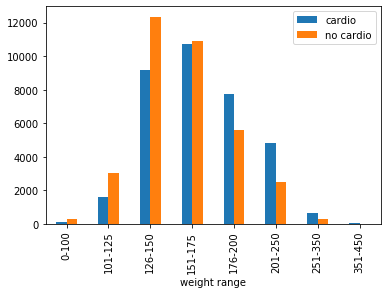

In [19]:
weight_range=cardio_data.groupby(["weight range", "cardio"]).count()["id"]
df=pd.DataFrame(weight_range.reset_index())
df

df=df.set_index("weight range")
df

no_cardio_df= df.loc[df ["cardio"] == 0 ]
no_cardio_df

cardio_df= df.loc[df ["cardio"] == 1 ]
cardio_df

combined_df= pd.DataFrame({
     "cardio": cardio_df["id"],
     "no cardio": no_cardio_df ["id"]
  })

combined_df.plot.bar()





In [26]:
# Bins are 0, 59.9, 69.9, 79.9, 89.9, 100.   
bmi_bins = [0, 16, 17, 18.5, 25, 30, 35, 40, 299]

# Create the names for the four bins
bmi_group_names = ["Severe Thinness","Moderate Thinness", "Mild Thinness", "Normal", "Overweight", "Obese Class I", "Obese Class II", "Obese Class III"]

cardio_data["BMI range"] = pd.cut(cardio_data["BMI"], bmi_bins, labels=bmi_group_names, include_lowest=True)
cardio_data




#https://www.calculator.net/bmi-calculator.html
# severe thinness< 16
# Moderate Thinness	16 - 17
# Mild Thinness	17 - 18.5
# Normal	18.5 - 25
# Overweight	25 - 30
# Obese Class I	30 - 35
# Obese Class II	35 - 40
# Obese Class III	> 40

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs,BMI,weight range,BMI range
0,0,female,110,80,1,1,0,0,1,0,50.0,5.516000,136.710,21.935352,126-150,Normal
1,1,male,140,90,3,1,0,0,1,1,55.0,5.122000,187.425,34.877167,176-200,Obese Class I
2,2,male,130,70,3,1,0,0,0,1,51.0,5.417500,141.120,23.473809,126-150,Normal
3,3,female,150,100,1,1,0,0,1,1,48.0,5.548833,180.810,28.668959,176-200,Overweight
4,4,male,100,60,1,1,0,0,0,0,47.0,5.122000,123.480,22.977898,101-125,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,female,120,80,1,1,1,0,1,0,52.0,5.516000,167.580,26.888496,151-175,Overweight
69996,99995,male,140,90,2,2,0,0,1,1,61.0,5.187667,277.830,50.399688,251-350,Obese Class III
69997,99996,female,180,90,3,1,0,1,0,1,52.0,6.008500,231.525,31.308236,201-250,Obese Class I
69998,99998,male,135,80,1,2,0,0,0,1,61.0,5.351833,158.760,27.060060,151-175,Overweight


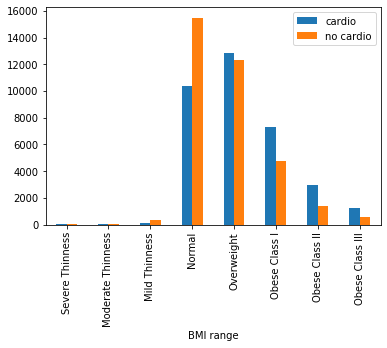

In [27]:
bmi_range=cardio_data.groupby(["BMI range", "cardio"]).count()["id"]
bmi_df=pd.DataFrame(bmi_range.reset_index())
bmi_df

bmi_df=bmi_df.set_index("BMI range")
bmi_df

bmi_no_cardio_df= bmi_df.loc[bmi_df ["cardio"] == 0 ]
bmi_no_cardio_df

bmi_cardio_df= bmi_df.loc[bmi_df ["cardio"] == 1 ]
bmi_cardio_df

bmi_combined_df= pd.DataFrame({
     "cardio": bmi_cardio_df["id"],
     "no cardio": bmi_no_cardio_df ["id"]
  })

bmi_combined_df.plot.bar()



In [36]:
#dependencies
import pandas as pd
import math 
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import csv

In [37]:
#file
health_data_to_load = "cardio_train_project_1.csv"

#read & store
cardio_data = pd.read_csv(health_data_to_load)

cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [38]:
# 'floor' returns largest integer less than or equal to x. 'ceiling' returns smallest integer. >== x
#convert age to years, round down
age_in_years = (cardio_data["age"]/365).apply(np.floor)

#add column
cardio_data["Age in Years"] = age_in_years

In [39]:
cardio_data = cardio_data.drop("age", 1)

In [40]:
#cm to ft
height_in_feet = (cardio_data["height"]*.394)/12
cardio_data["height"].apply(np.floor)

#insert as new column
cardio_data["Height in Feet"] = height_in_feet

In [41]:
cardio_data = cardio_data.drop("height", 1)

cardio_data

,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet
0,0,2,62.0,110,80,1,1,0,0,1,0,50.0,5.516000
1,1,1,85.0,140,90,3,1,0,0,1,1,55.0,5.122000
2,2,1,64.0,130,70,3,1,0,0,0,1,51.0,5.417500
3,3,2,82.0,150,100,1,1,0,0,1,1,48.0,5.548833
4,4,1,56.0,100,60,1,1,0,0,0,0,47.0,5.122000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,76.0,120,80,1,1,1,0,1,0,52.0,5.516000
69996,99995,1,126.0,140,90,2,2,0,0,1,1,61.0,5.187667
69997,99996,2,105.0,180,90,3,1,0,1,0,1,52.0,6.008500
69998,99998,1,72.0,135,80,1,2,0,0,0,1,61.0,5.351833


In [42]:
gender_id = cardio_data["gender"].map({1:"Male", 2:"Female"})
cardio_data["Gender ID"] = gender_id


cardio_data

,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,Gender ID
0,0,2,62.0,110,80,1,1,0,0,1,0,50.0,5.516000,Female
1,1,1,85.0,140,90,3,1,0,0,1,1,55.0,5.122000,Male
2,2,1,64.0,130,70,3,1,0,0,0,1,51.0,5.417500,Male
3,3,2,82.0,150,100,1,1,0,0,1,1,48.0,5.548833,Female
4,4,1,56.0,100,60,1,1,0,0,0,0,47.0,5.122000,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,76.0,120,80,1,1,1,0,1,0,52.0,5.516000,Female
69996,99995,1,126.0,140,90,2,2,0,0,1,1,61.0,5.187667,Male
69997,99996,2,105.0,180,90,3,1,0,1,0,1,52.0,6.008500,Female
69998,99998,1,72.0,135,80,1,2,0,0,0,1,61.0,5.351833,Male


In [44]:
weight_in_lbs = (cardio_data["weight"]*2.205).apply(np.floor)
cardio_data["Weight in lbs"] = weight_in_lbs

#insert as new column
cardio_data["Weight in lbs"] = weight_in_lbs

In [45]:
cardio_data = cardio_data.drop("weight", 1)

cardio_data

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,Gender ID,Weight in lbs
0,0,2,110,80,1,1,0,0,1,0,50.0,5.516000,Female,136.0
1,1,1,140,90,3,1,0,0,1,1,55.0,5.122000,Male,187.0
2,2,1,130,70,3,1,0,0,0,1,51.0,5.417500,Male,141.0
3,3,2,150,100,1,1,0,0,1,1,48.0,5.548833,Female,180.0
4,4,1,100,60,1,1,0,0,0,0,47.0,5.122000,Male,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,120,80,1,1,1,0,1,0,52.0,5.516000,Female,167.0
69996,99995,1,140,90,2,2,0,0,1,1,61.0,5.187667,Male,277.0
69997,99996,2,180,90,3,1,0,1,0,1,52.0,6.008500,Female,231.0
69998,99998,1,135,80,1,2,0,0,0,1,61.0,5.351833,Male,158.0


In [46]:
Age = [0, 36, 41, 46, 51, 56, 61, 66, 70, 76]
labels = ["0-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65", "66-70", "75+"]
pd.cut(cardio_data["Age in Years"], Age, labels = labels).head()

0    46-50
1    51-55
2    46-50
3    46-50
4    46-50
Name: Age in Years, dtype: category
Categories (9, object): [0-35 < 36-40 < 41-45 < 46-50 ... 56-60 < 61-65 < 66-70 < 75+]

In [47]:
# Active?

cardio_data['active'] = cardio_data['active'].replace(0, "Not Active")
cardio_data['active'] = cardio_data['active'].replace(1, "Active")


cardio_data

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,Gender ID,Weight in lbs
0,0,2,110,80,1,1,0,0,Active,0,50.0,5.516000,Female,136.0
1,1,1,140,90,3,1,0,0,Active,1,55.0,5.122000,Male,187.0
2,2,1,130,70,3,1,0,0,Not Active,1,51.0,5.417500,Male,141.0
3,3,2,150,100,1,1,0,0,Active,1,48.0,5.548833,Female,180.0
4,4,1,100,60,1,1,0,0,Not Active,0,47.0,5.122000,Male,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,120,80,1,1,1,0,Active,0,52.0,5.516000,Female,167.0
69996,99995,1,140,90,2,2,0,0,Active,1,61.0,5.187667,Male,277.0
69997,99996,2,180,90,3,1,0,1,Not Active,1,52.0,6.008500,Female,231.0
69998,99998,1,135,80,1,2,0,0,Not Active,1,61.0,5.351833,Male,158.0


In [48]:
active = cardio_data ["active"].value_counts()

active


Active        56261
Not Active    13739
Name: active, dtype: int64

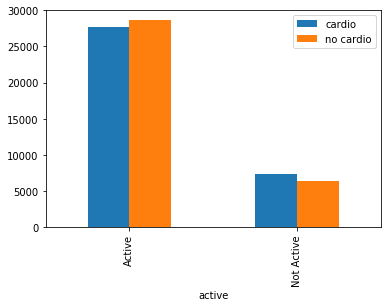

In [57]:
active_graph = cardio_data.groupby(["active", "cardio"]).count()["id"]
df = pd.DataFrame(active_graph.reset_index())
df

df=df.set_index("active")
df

no_cardio_df = df.loc[df ["cardio"] == 0 ]
no_cardio_df

cardio_df = df.loc[df ["cardio"] == 1 ]
cardio_df

combined_df= pd.DataFrame({
     "cardio": cardio_df["id"],
     "no cardio": no_cardio_df ["id"]
  })

combined_df.plot.bar()


In [58]:
%matplotlib inline
import pandas as pd
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import csv

In [60]:
Cardio_study = "cardio_train_project_1.csv"
cardio_study_df = pd.read_csv(Cardio_study, encoding="ISO-8859-1")

# del cardio_study_df["cardio"]
del cardio_study_df["smoke"]
del cardio_study_df["gluc"]


cardio_study_df


cardio_study_df

# cardio_study_df.dtypes

# cardio_study_df["cholesterol"].value_counts()
# cardio_study_df["alco"].value_counts()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,0,1,0
1,1,20228,1,156,85.0,140,90,3,0,1,1
2,2,18857,1,165,64.0,130,70,3,0,0,1
3,3,17623,2,169,82.0,150,100,1,0,1,1
4,4,17474,1,156,56.0,100,60,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,0,0,1


In [61]:
age_in_years=(cardio_study_df["age"]/365).apply(np.floor)
age_in_years
cardio_study_df["age in years"] = age_in_years

height_in_feet=(cardio_study_df["height"]*.394)/12
cardio_study_df["height"].apply(np.floor)
height_in_feet

height_in_inches=(cardio_study_df["height"]*.394)
cardio_study_df["height"].apply(np.floor)
height_in_inches

cardio_study_df["Height (in)"] = height_in_inches
cardio_study_df["Height (Ft)"] = height_in_feet

gender_id = cardio_study_df["gender"].map({1:"Male", 2:"Female"})
gender_id
cardio_study_df["Gender ID"] = gender_id


weight_in_pounds = (cardio_study_df["weight"]*2.205).apply(np.floor)
weight_in_pounds
cardio_study_df["Weight (lbs)"] = weight_in_pounds

BMI = (cardio_study_df["Weight (lbs)"]/(cardio_study_df["Height (in)"]*cardio_study_df["Height (in)"]))*703
BMI
cardio_study_df["BMI"] = BMI



del cardio_study_df["age"]
del cardio_study_df["height"]
del cardio_study_df["weight"]
del cardio_study_df["gender"]


Age = [0, 36, 41, 46, 51, 56, 61, 66,]
labels = ["0-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65"]
pd.cut(cardio_study_df["age in years"], Age, labels=labels).head()
cardio_study_df["Age Group"] = pd.cut(cardio_study_df["age in years"], Age, labels=labels)

BMI_groups = [0, 18.5, 25, 29.9, 100]
labelsB = ["underweight", "normal", "overwieght", "very overwieght" ]
pd.cut(cardio_study_df["BMI"], BMI_groups, labels=labelsB).head()
cardio_study_df["BMI Group"] = pd.cut(cardio_study_df["BMI"], BMI_groups, labels=labelsB)

cardio_study_df = cardio_study_df.sort_values("Age Group", ascending=True)

cardio_study_df



,id,ap_hi,ap_lo,cholesterol,alco,active,cardio,age in years,Height (in),Height (Ft),Gender ID,Weight (lbs),BMI,Age Group,BMI Group
30666,43842,120,80,1,0,1,0,29.0,62.646,5.220500,Male,130.0,23.286916,0-35,normal
6219,8850,120,80,1,0,1,0,29.0,68.950,5.745833,Male,130.0,19.223397,0-35,normal
22343,31922,100,60,1,0,1,0,29.0,68.950,5.745833,Female,202.0,29.870202,0-35,overwieght
55905,79749,110,70,1,0,1,0,30.0,63.040,5.253333,Male,130.0,22.996740,0-35,normal
27061,38690,120,80,1,0,1,0,39.0,61.070,5.089167,Male,165.0,31.101650,36-40,very overwieght
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34215,48890,140,90,1,0,1,1,64.0,64.222,5.351833,Male,145.0,24.714719,61-65,normal
17863,25531,120,80,3,0,1,1,62.0,66.192,5.516000,Male,189.0,30.325371,61-65,very overwieght
17861,25529,120,80,1,0,0,1,62.0,60.282,5.023500,Male,123.0,23.794968,61-65,normal
46092,65845,110,70,1,0,1,0,62.0,57.524,4.793667,Male,169.0,35.904086,61-65,very overwieght


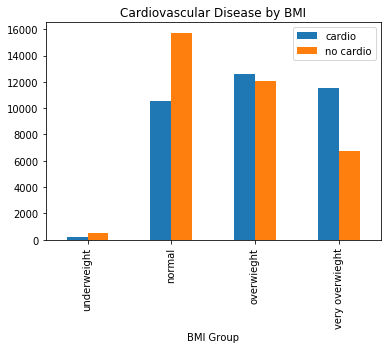

In [62]:
Age_Group=cardio_study_df.groupby(["BMI Group", "cardio"]).count()["id"]
df=pd.DataFrame(Age_Group.reset_index())
df
df=df.set_index("BMI Group")
no_cardio_df=df.loc[df["cardio"]==0]
no_cardio_df

cardio_df=df.loc[df["cardio"]==1]
cardio_df
combined_df=pd.DataFrame({"cardio":cardio_df["id"], "no cardio": no_cardio_df["id"]})

combined_df.plot.bar(stacked=False, title="Cardiovascular Disease by BMI")
plt.savefig("../carioddiseasebybmi.png")

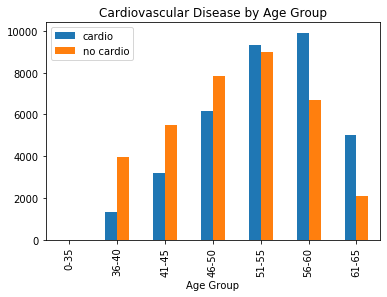

In [63]:
Age_Group=cardio_study_df.groupby(["Age Group", "cardio"]).count()["id"]
dfAG=pd.DataFrame(Age_Group.reset_index())
dfAG
dfAG=dfAG.set_index("Age Group")
no_cardio_dfAG=dfAG.loc[dfAG["cardio"]==0]
no_cardio_dfAG

cardio_dfAG=dfAG.loc[dfAG["cardio"]==1]
cardio_dfAG
combined_dfAG=pd.DataFrame({"cardio":cardio_dfAG["id"], "no cardio": no_cardio_dfAG["id"]})

combined_dfAG.plot.bar(stacked=False, title="Cardiovascular Disease by Age Group")
plt.savefig("../carioddiseasebyage.png")

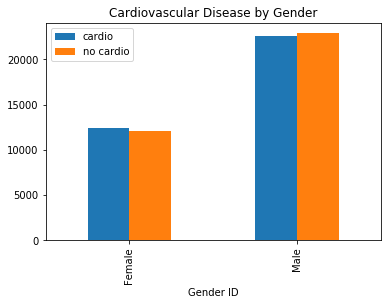

In [64]:
Gender_Group=cardio_study_df.groupby(["Gender ID", "cardio"]).count()["id"]
dfM=pd.DataFrame(Gender_Group.reset_index())
dfM
dfM=dfM.set_index("Gender ID")
dfM
no_cardio_df2=dfM.loc[dfM["cardio"]==0]
no_cardio_df2.head()

cardio_df2=dfM.loc[dfM["cardio"]==1]
cardio_df2
combined_df2=pd.DataFrame({"cardio":cardio_df2["id"], "no cardio": no_cardio_df2["id"]})

combined_df2.plot.bar(stacked=False, title="Cardiovascular Disease by Gender")



plt.savefig("../carioddiseasebygender.png")

In [65]:
With_Disease = cardio_study_df.loc[cardio_study_df["cardio"] == 1]
With_Disease.head()

,id,ap_hi,ap_lo,cholesterol,alco,active,cardio,age in years,Height (in),Height (Ft),Gender ID,Weight (lbs),BMI,Age Group,BMI Group
59424,84846,110,70,1,0,0,1,40.0,63.040,5.253333,Male,138.0,24.411924,36-40,normal
18315,26153,120,80,2,1,1,1,41.0,66.192,5.516000,Female,183.0,29.362661,36-40,overwieght
59441,84873,110,80,2,0,0,1,41.0,65.798,5.483167,Male,141.0,22.895443,36-40,normal
5309,7554,150,90,1,0,1,1,40.0,67.374,5.614500,Female,191.0,29.580399,36-40,overwieght
5303,7546,120,80,1,0,1,1,39.0,65.798,5.483167,Female,160.0,25.980645,36-40,overwieght


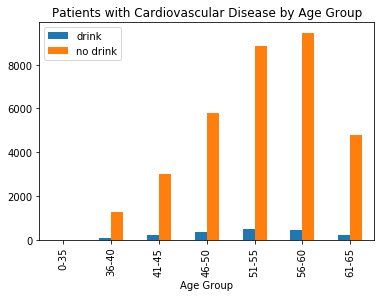

In [66]:
Age_Group=With_Disease.groupby(["Age Group", "alco", "cardio"]).count()["id"]
dfN=pd.DataFrame(Age_Group.reset_index())

dfN=dfN.set_index("Age Group")
dfN
no_drink_df=dfN.loc[dfN["alco"]==0]
no_drink_df

drink_df=dfN.loc[dfN["alco"]==1]
drink_df
combined_drink_df=pd.DataFrame({"drink":drink_df["id"], "no drink": no_drink_df["id"]})

combined_drink_df.plot.bar(stacked=False, title="Patients with Cardiovascular Disease by Age Group")
plt.savefig("../withcarioddiseasebybage.png")

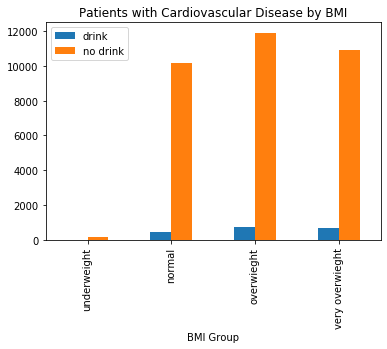

In [67]:
Age_Group=With_Disease.groupby(["BMI Group", "alco", "cardio"]).count()["id"]
dfN2=pd.DataFrame(Age_Group.reset_index())
dfN2
dfN2=dfN2.set_index("BMI Group")
no_drink_dfN2=dfN2.loc[dfN2["alco"]==0]
no_drink_dfN2

drink_dfN2=dfN2.loc[dfN2["alco"]==1]
drink_dfN2
combined_drink_dfN2=pd.DataFrame({"drink":drink_dfN2["id"], "no drink": no_drink_dfN2["id"]})

combined_drink_dfN2.plot.bar(stacked=False, title="Patients with Cardiovascular Disease by BMI")
plt.savefig("../withcarioddiseasebybmi.png")

In [68]:
Without_Disease = cardio_study_df.loc[cardio_study_df["cardio"] == 0]
Without_Disease.head()

,id,ap_hi,ap_lo,cholesterol,alco,active,cardio,age in years,Height (in),Height (Ft),Gender ID,Weight (lbs),BMI,Age Group,BMI Group
30666,43842,120,80,1,0,1,0,29.0,62.646,5.220500,Male,130.0,23.286916,0-35,normal
6219,8850,120,80,1,0,1,0,29.0,68.950,5.745833,Male,130.0,19.223397,0-35,normal
22343,31922,100,60,1,0,1,0,29.0,68.950,5.745833,Female,202.0,29.870202,0-35,overwieght
55905,79749,110,70,1,0,1,0,30.0,63.040,5.253333,Male,130.0,22.996740,0-35,normal
27061,38690,120,80,1,0,1,0,39.0,61.070,5.089167,Male,165.0,31.101650,36-40,very overwieght


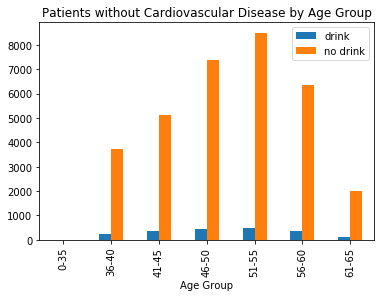

In [69]:
Age_Group=Without_Disease.groupby(["Age Group", "alco", "cardio"]).count()["id"]
dfO=pd.DataFrame(Age_Group.reset_index())
dfO
dfO=dfO.set_index("Age Group")
no_drink_dfO=dfO.loc[dfO["alco"]==0]
no_drink_dfO

drink_dfO=dfO.loc[dfO["alco"]==1]
drink_dfO
combined_drink_dfO=pd.DataFrame({"drink":drink_dfO["id"], "no drink": no_drink_dfO["id"]})

combined_drink_dfO.plot.bar(stacked=False, title="Patients without Cardiovascular Disease by Age Group")
plt.savefig("../withoutcarioddiseasebyage.png")

In [70]:
Female_with_disease = With_Disease.loc[With_Disease["Gender ID"] == "Female"]
Female_with_disease.head()

,id,ap_hi,ap_lo,cholesterol,alco,active,cardio,age in years,Height (in),Height (Ft),Gender ID,Weight (lbs),BMI,Age Group,BMI Group
18315,26153,120,80,2,1,1,1,41.0,66.192,5.516000,Female,183.0,29.362661,36-40,overwieght
5309,7554,150,90,1,0,1,1,40.0,67.374,5.614500,Female,191.0,29.580399,36-40,overwieght
5303,7546,120,80,1,0,1,1,39.0,65.798,5.483167,Female,160.0,25.980645,36-40,overwieght
59416,84836,140,90,1,0,0,1,39.0,68.950,5.745833,Female,227.0,33.567009,36-40,very overwieght
21140,30199,200,110,1,0,1,1,40.0,68.556,5.713000,Female,185.0,27.671717,36-40,overwieght


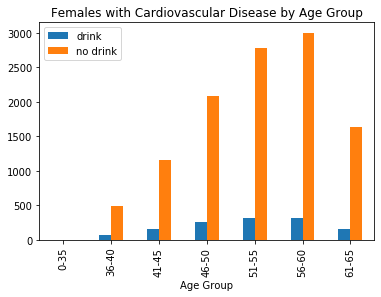

In [71]:
Age_Group=Female_with_disease.groupby(["Age Group", "alco", "cardio"]).count()["id"]
dfF=pd.DataFrame(Age_Group.reset_index())
dfF
dfF=dfF.set_index("Age Group")
no_drink_dfF=dfF.loc[dfF["alco"]==0]
no_drink_dfF

drink_dfF=dfF.loc[dfF["alco"]==1]
drink_dfF
combined_drink_dfF=pd.DataFrame({"drink":drink_dfF["id"], "no drink": no_drink_dfF["id"]})

combined_drink_dfF.plot.bar(stacked=False, title="Females with Cardiovascular Disease by Age Group")
plt.savefig("../femalecarioddiseasebyage.png")

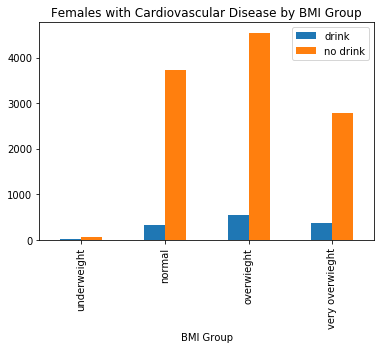

In [72]:
BMI_Group=Female_with_disease.groupby(["BMI Group", "alco", "cardio"]).count()["id"]
dfX=pd.DataFrame(BMI_Group.reset_index())
dfX
dfX=dfX.set_index("BMI Group")
no_drink_dfX=dfX.loc[dfX["alco"]==0]
no_drink_dfX

drink_dfX=dfX.loc[dfX["alco"]==1]
drink_dfX
combined_drink_dfX=pd.DataFrame({"drink":drink_dfX["id"], "no drink": no_drink_dfX["id"]})

combined_drink_dfX.plot.bar(stacked=False, title="Females with Cardiovascular Disease by BMI Group")
plt.savefig("../femaleswithcarioddiseasebybmi.png")

In [73]:
Female_without_disease = Without_Disease.loc[Without_Disease["Gender ID"] == "Female"]
Female_without_disease.head()

,id,ap_hi,ap_lo,cholesterol,alco,active,cardio,age in years,Height (in),Height (Ft),Gender ID,Weight (lbs),BMI,Age Group,BMI Group
22343,31922,100,60,1,0,1,0,29.0,68.950,5.745833,Female,202.0,29.870202,0-35,overwieght
12331,17609,120,80,1,0,0,0,41.0,68.950,5.745833,Female,165.0,24.398927,36-40,normal
45439,64915,120,80,1,0,1,0,39.0,59.100,4.925000,Female,160.0,32.203298,36-40,very overwieght
18319,26159,110,70,1,0,1,0,40.0,70.526,5.877167,Female,154.0,21.765946,36-40,normal
45524,65030,120,79,1,0,1,0,39.0,63.040,5.253333,Female,121.0,21.404658,36-40,normal


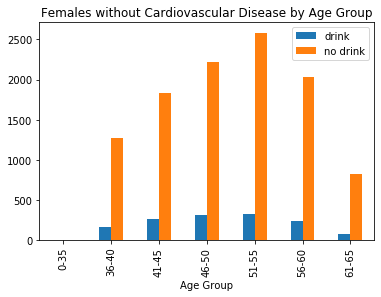

In [74]:
Age_Group=Female_without_disease.groupby(["Age Group", "alco", "cardio"]).count()["id"]
dfG=pd.DataFrame(Age_Group.reset_index())
dfG
dfG=dfG.set_index("Age Group")
no_drink_dfG=dfG.loc[dfG["alco"]==0]
no_drink_dfG

drink_dfG=dfG.loc[dfG["alco"]==1]
drink_dfG
combined_drink_dfG=pd.DataFrame({"drink":drink_dfG["id"], "no drink": no_drink_dfG["id"]})

combined_drink_dfG.plot.bar(stacked=False, title="Females without Cardiovascular Disease by Age Group")
plt.savefig("../femaleswithoutcarioddiseasebyage.png")

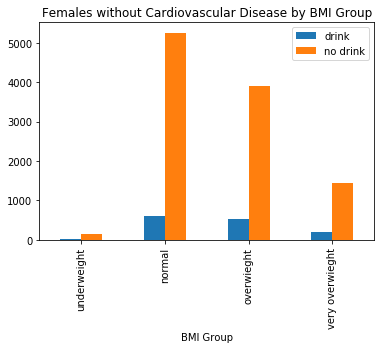

In [75]:
BMI_Group=Female_without_disease.groupby(["BMI Group", "alco", "cardio"]).count()["id"]
dfZ=pd.DataFrame(BMI_Group.reset_index())
dfZ
dfZ=dfZ.set_index("BMI Group")
no_drink_dfZ=dfZ.loc[dfZ["alco"]==0]
no_drink_dfZ

drink_dfZ=dfZ.loc[dfZ["alco"]==1]
drink_dfZ
combined_drink_dfZ=pd.DataFrame({"drink":drink_dfZ["id"], "no drink": no_drink_dfZ["id"]})

combined_drink_dfZ.plot.bar(stacked=False, title="Females without Cardiovascular Disease by BMI Group")
plt.savefig("../femaleswithoutcarioddiseasebybmi.png")

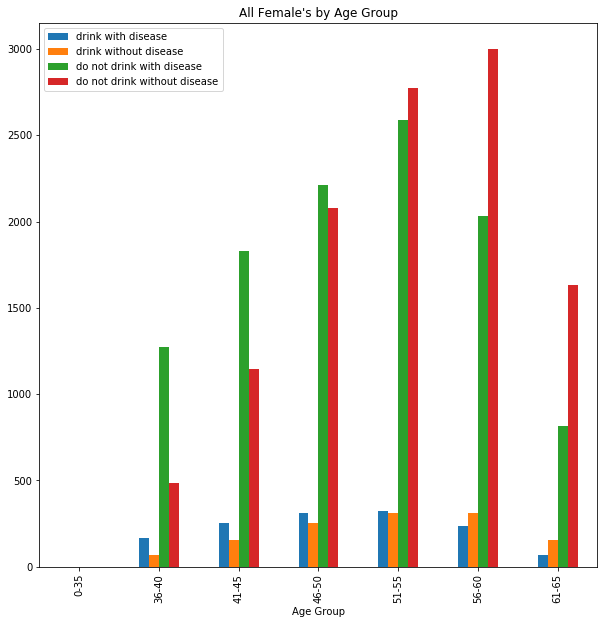

In [76]:
combined_female_drinkers=pd.DataFrame({"drink with disease":drink_dfG["id"], "drink without disease":drink_dfF["id"], "do not drink with disease":no_drink_dfG["id"], "do not drink without disease":no_drink_dfF["id"]})
combined_female_drinkers.plot.bar(stacked=False, figsize=(10,10), title="All Female's by Age Group")
plt.savefig("../allfemalescarioddiseasebyage.png")

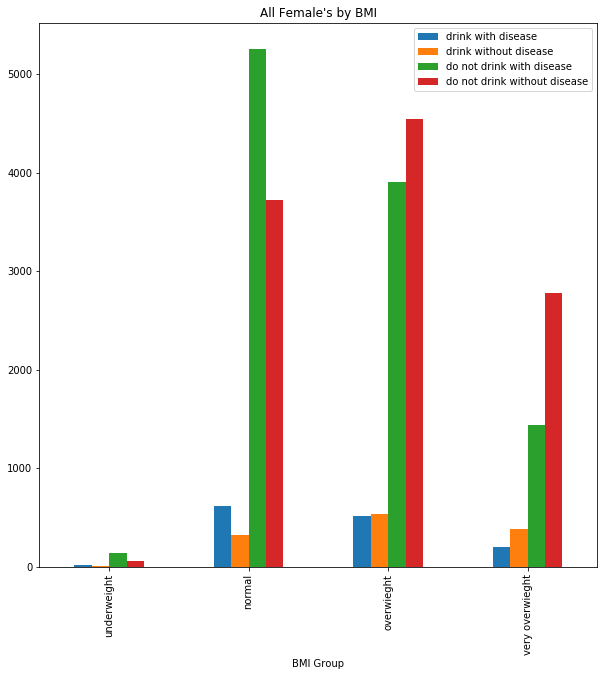

In [77]:
combined_female_drinkersBM=pd.DataFrame({"drink with disease":drink_dfZ["id"], "drink without disease":drink_dfX["id"], "do not drink with disease":no_drink_dfZ["id"], "do not drink without disease":no_drink_dfX["id"]})
combined_female_drinkersBM.plot.bar(stacked=False, figsize=(10,10), title="All Female's by BMI")
plt.savefig("../allfemalescarioddiseasebybmi.png")

In [78]:
Male_study = cardio_study_df.loc[cardio_study_df["Gender ID"] == "Male"]
Male_study.head()

,id,ap_hi,ap_lo,cholesterol,alco,active,cardio,age in years,Height (in),Height (Ft),Gender ID,Weight (lbs),BMI,Age Group,BMI Group
30666,43842,120,80,1,0,1,0,29.0,62.646,5.220500,Male,130.0,23.286916,0-35,normal
6219,8850,120,80,1,0,1,0,29.0,68.950,5.745833,Male,130.0,19.223397,0-35,normal
55905,79749,110,70,1,0,1,0,30.0,63.040,5.253333,Male,130.0,22.996740,0-35,normal
27061,38690,120,80,1,0,1,0,39.0,61.070,5.089167,Male,165.0,31.101650,36-40,very overwieght
59424,84846,110,70,1,0,0,1,40.0,63.040,5.253333,Male,138.0,24.411924,36-40,normal


In [79]:
Male_with_disease = With_Disease.loc[With_Disease["Gender ID"] == "Male"]
Male_with_disease.head()

,id,ap_hi,ap_lo,cholesterol,alco,active,cardio,age in years,Height (in),Height (Ft),Gender ID,Weight (lbs),BMI,Age Group,BMI Group
59424,84846,110,70,1,0,0,1,40.0,63.040,5.253333,Male,138.0,24.411924,36-40,normal
59441,84873,110,80,2,0,0,1,41.0,65.798,5.483167,Male,141.0,22.895443,36-40,normal
18308,26144,140,80,1,0,1,1,41.0,64.222,5.351833,Male,185.0,31.532572,36-40,very overwieght
45487,64983,130,70,1,0,1,1,40.0,63.040,5.253333,Male,174.0,30.780252,36-40,very overwieght
33227,47486,140,80,3,0,1,1,39.0,66.586,5.548833,Male,174.0,27.589175,36-40,overwieght


In [80]:
Male_without_disease = Without_Disease.loc[Without_Disease["Gender ID"] == "Male"]
Male_without_disease.head()

,id,ap_hi,ap_lo,cholesterol,alco,active,cardio,age in years,Height (in),Height (Ft),Gender ID,Weight (lbs),BMI,Age Group,BMI Group
30666,43842,120,80,1,0,1,0,29.0,62.646,5.220500,Male,130.0,23.286916,0-35,normal
6219,8850,120,80,1,0,1,0,29.0,68.950,5.745833,Male,130.0,19.223397,0-35,normal
55905,79749,110,70,1,0,1,0,30.0,63.040,5.253333,Male,130.0,22.996740,0-35,normal
27061,38690,120,80,1,0,1,0,39.0,61.070,5.089167,Male,165.0,31.101650,36-40,very overwieght
45482,64978,120,80,1,0,1,0,40.0,63.040,5.253333,Male,132.0,23.350536,36-40,normal


In [81]:
Drinkers = cardio_study_df.loc[cardio_study_df["alco"] == 1]
Drinkers.head()

,id,ap_hi,ap_lo,cholesterol,alco,active,cardio,age in years,Height (in),Height (Ft),Gender ID,Weight (lbs),BMI,Age Group,BMI Group
18315,26153,120,80,2,1,1,1,41.0,66.192,5.516000,Female,183.0,29.362661,36-40,overwieght
45543,65059,160,100,1,1,1,1,41.0,61.858,5.154833,Male,183.0,33.621313,36-40,very overwieght
45420,64887,110,80,2,1,1,0,39.0,65.798,5.483167,Female,141.0,22.895443,36-40,normal
45319,64747,120,80,1,1,0,0,39.0,66.980,5.581667,Female,149.0,23.348087,36-40,normal
18290,26119,130,70,1,1,0,1,41.0,68.950,5.745833,Female,154.0,22.772332,36-40,normal


In [82]:
Non_drinkers = cardio_study_df.loc[cardio_study_df["alco"] == 0]
Non_drinkers.head(1000000)

,id,ap_hi,ap_lo,cholesterol,alco,active,cardio,age in years,Height (in),Height (Ft),Gender ID,Weight (lbs),BMI,Age Group,BMI Group
30666,43842,120,80,1,0,1,0,29.0,62.646,5.220500,Male,130.0,23.286916,0-35,normal
6219,8850,120,80,1,0,1,0,29.0,68.950,5.745833,Male,130.0,19.223397,0-35,normal
22343,31922,100,60,1,0,1,0,29.0,68.950,5.745833,Female,202.0,29.870202,0-35,overwieght
55905,79749,110,70,1,0,1,0,30.0,63.040,5.253333,Male,130.0,22.996740,0-35,normal
27061,38690,120,80,1,0,1,0,39.0,61.070,5.089167,Male,165.0,31.101650,36-40,very overwieght
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34215,48890,140,90,1,0,1,1,64.0,64.222,5.351833,Male,145.0,24.714719,61-65,normal
17863,25531,120,80,3,0,1,1,62.0,66.192,5.516000,Male,189.0,30.325371,61-65,very overwieght
17861,25529,120,80,1,0,0,1,62.0,60.282,5.023500,Male,123.0,23.794968,61-65,normal
46092,65845,110,70,1,0,1,0,62.0,57.524,4.793667,Male,169.0,35.904086,61-65,very overwieght
